# Data Visualization

## Imports

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from tabulate import tabulate
import matplotlib.patches as mpatches
import numpy as np
from scipy.stats import mannwhitneyu
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error, confusion_matrix, classification_report, ConfusionMatrixDisplay

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# Apple Health Data

## Step Count

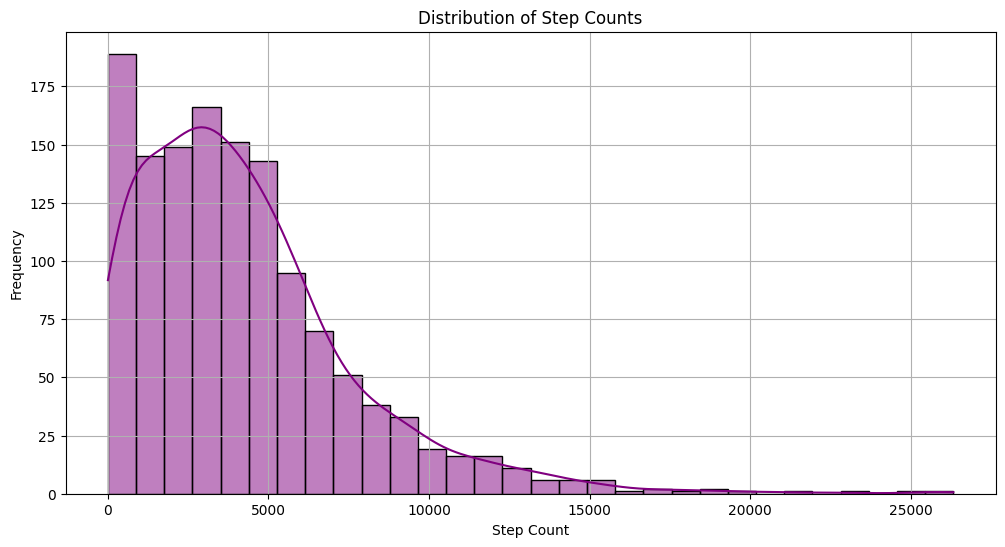

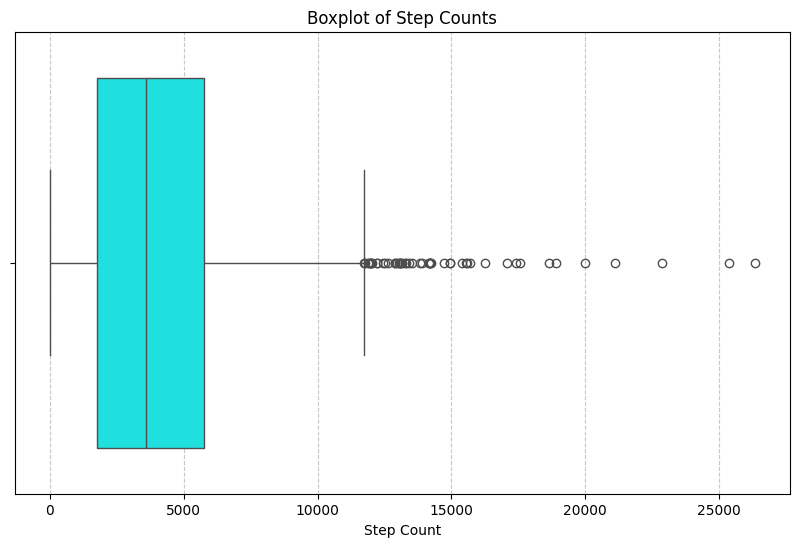

In [ ]:
data = pd.read_csv("/content/stepcount_data.csv")

data['date'] = pd.to_datetime(data['date'])

data.rename(columns={'value': 'StepCount'}, inplace=True)

# Histogram
plt.figure(figsize=(12, 6))
sns.histplot(data['StepCount'], bins=30, kde=True, color='purple')
plt.title("Distribution of Step Counts")
plt.xlabel("Step Count")
plt.ylabel("Frequency")
plt.grid()
plt.show()

# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['StepCount'], color='cyan')
plt.title("Boxplot of Step Counts")
plt.xlabel("Step Count")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

### Average Step Count by Month

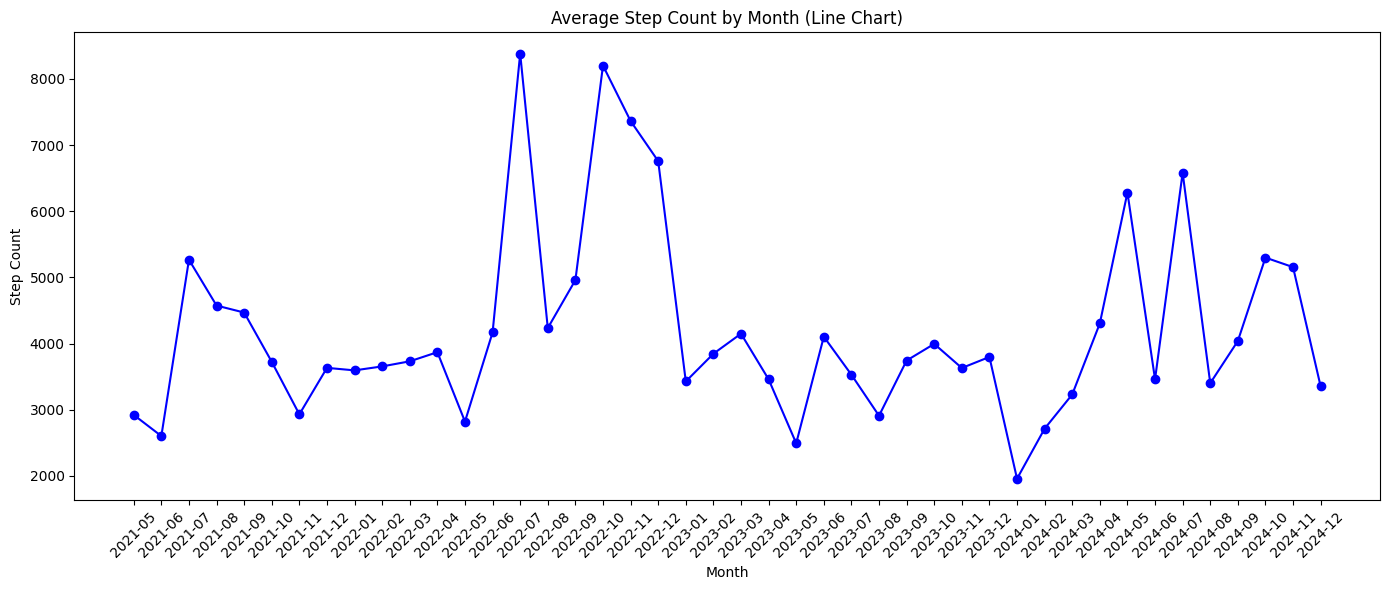

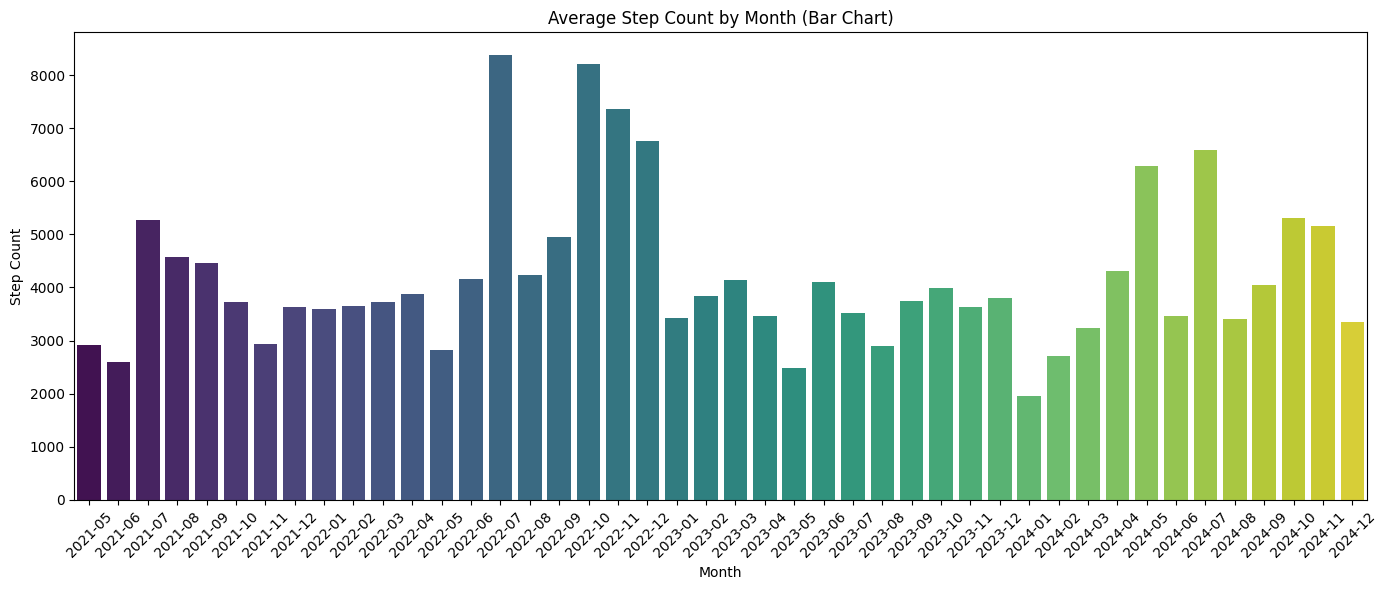

In [ ]:
step_count = pd.read_csv('/content/stepcount_data.csv')

step_count['date'] = pd.to_datetime(step_count['date'])
step_count['month'] = step_count['date'].dt.to_period("M")

step_count_grouped = step_count.groupby('month')['value'].mean().reset_index()

# Line chart with markers
plt.figure(figsize=(14, 6))
plt.plot(step_count_grouped['month'].astype(str), step_count_grouped['value'], marker='o', linestyle='-', color='blue')
plt.title('Average Step Count by Month (Line Chart)')
plt.xlabel('Month')
plt.ylabel('Step Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Bar Chart
plt.figure(figsize=(14, 6))
sns.barplot(x=step_count_grouped['month'].astype(str), y=step_count_grouped['value'], palette='viridis')
plt.title('Average Step Count by Month (Bar Chart)')
plt.xlabel('Month')
plt.ylabel('Step Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Flights Climbed

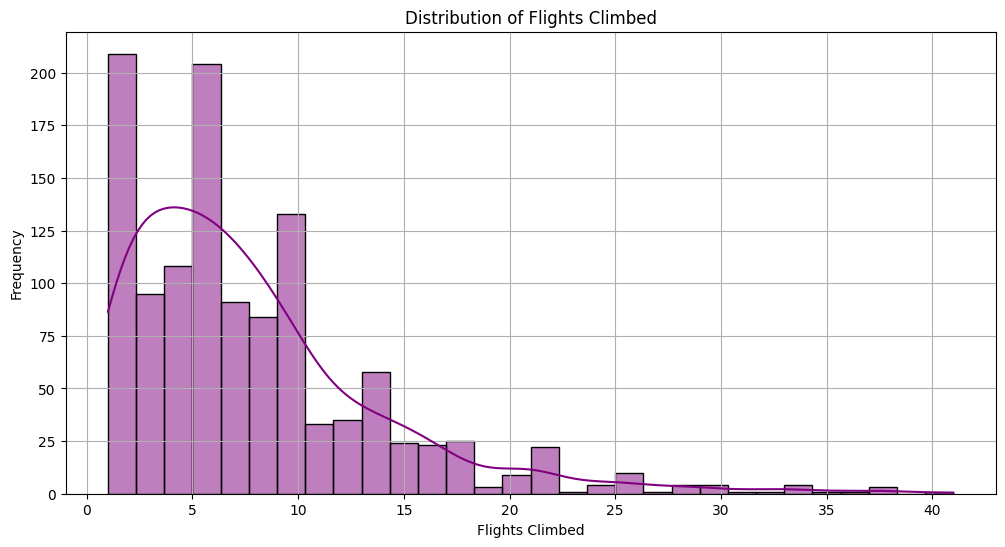

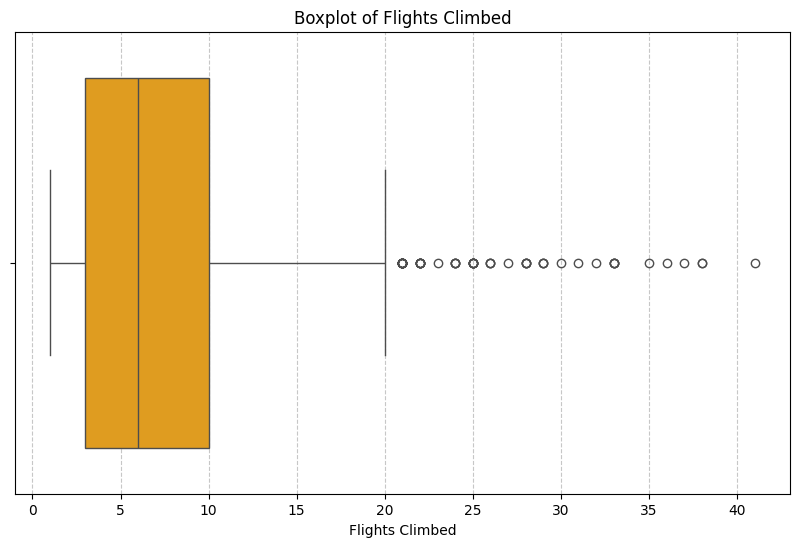

In [ ]:
data = pd.read_csv("flightsclimbed_data.csv")

data['date'] = pd.to_datetime(data['date'])

data.rename(columns={'value': 'FlightsClimbed'}, inplace=True)

# Histogram
plt.figure(figsize=(12, 6))
sns.histplot(data['FlightsClimbed'], bins=30, kde=True, color='purple')
plt.title("Distribution of Flights Climbed")
plt.xlabel("Flights Climbed")
plt.ylabel("Frequency")
plt.grid()
plt.show()

# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['FlightsClimbed'], color='orange')
plt.title("Boxplot of Flights Climbed")
plt.xlabel("Flights Climbed")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

### Average Flights Climbed by Month

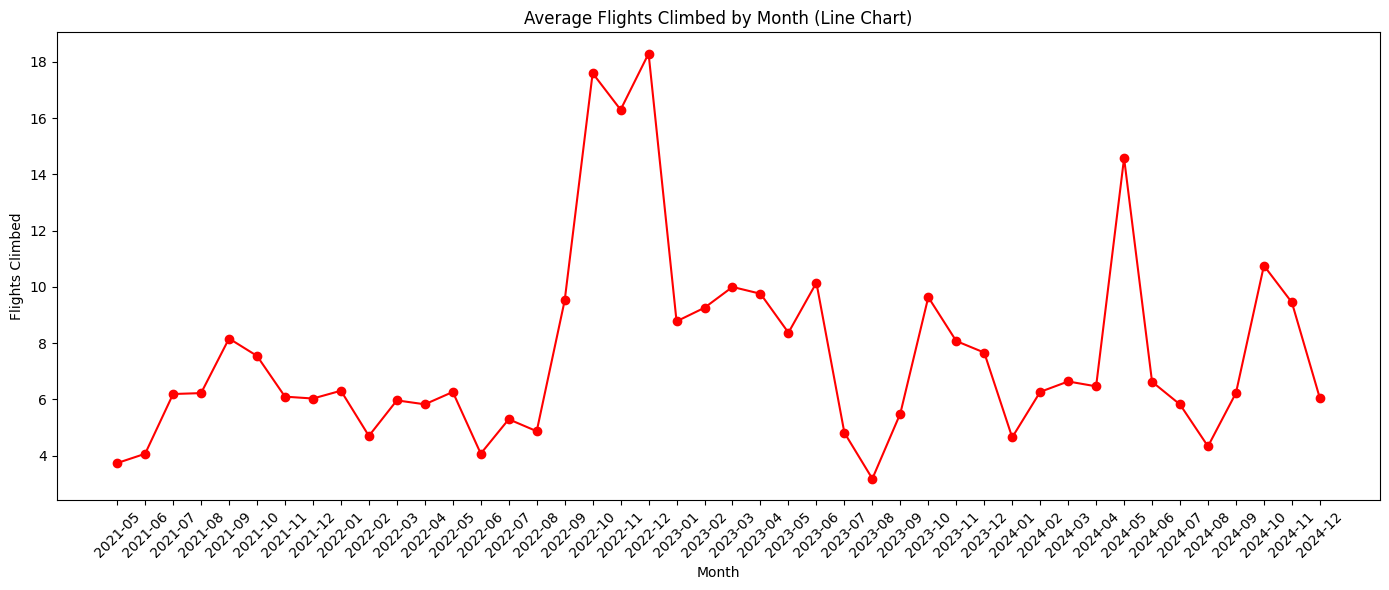

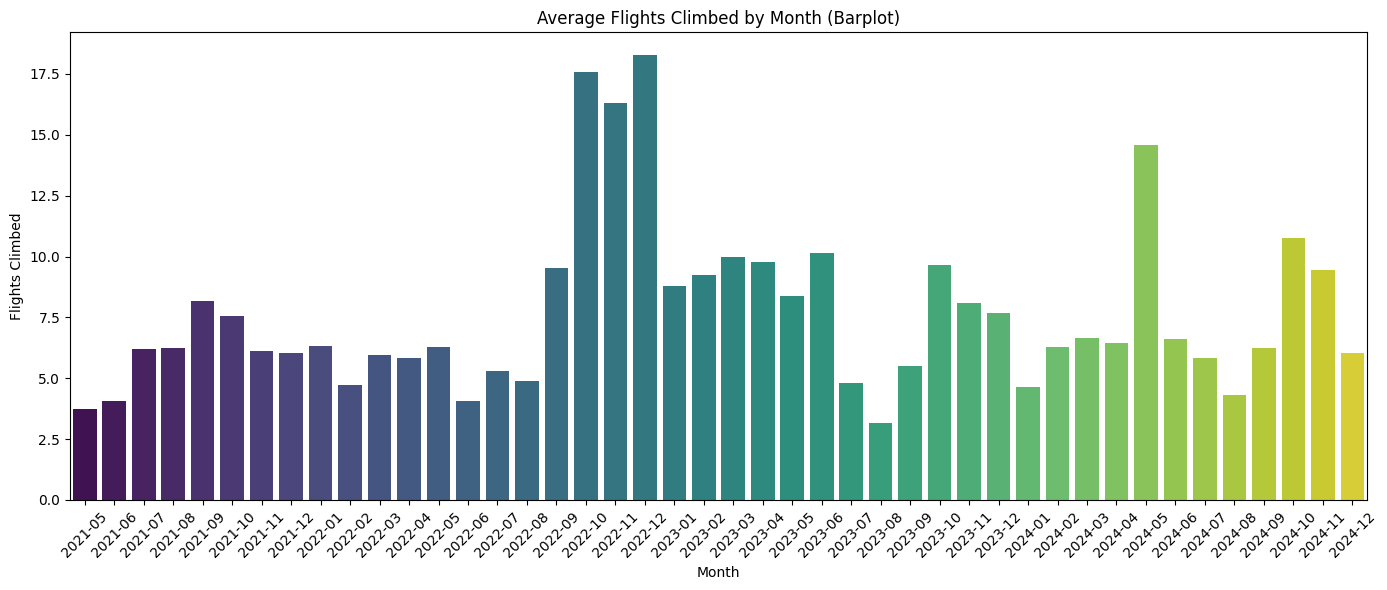

In [ ]:
flights_climbed = pd.read_csv('/content/flightsclimbed_data.csv')

flights_climbed['date'] = pd.to_datetime(flights_climbed['date'])
flights_climbed['month'] = flights_climbed['date'].dt.to_period("M")

flights_climbed_grouped = flights_climbed.groupby('month')['value'].mean().reset_index()

# Line chart with markers
plt.figure(figsize=(14, 6))
plt.plot(flights_climbed_grouped['month'].astype(str), flights_climbed_grouped['value'], marker='o', linestyle='-', color='red')
plt.title('Average Flights Climbed by Month (Line Chart)')
plt.xlabel('Month')
plt.ylabel('Flights Climbed')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Barplot
plt.figure(figsize=(14, 6))
sns.barplot(x=flights_climbed_grouped['month'].astype(str), y=flights_climbed_grouped['value'], palette='viridis')
plt.title('Average Flights Climbed by Month (Barplot)')
plt.xlabel('Month')
plt.ylabel('Flights Climbed')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Walking/Running Distance

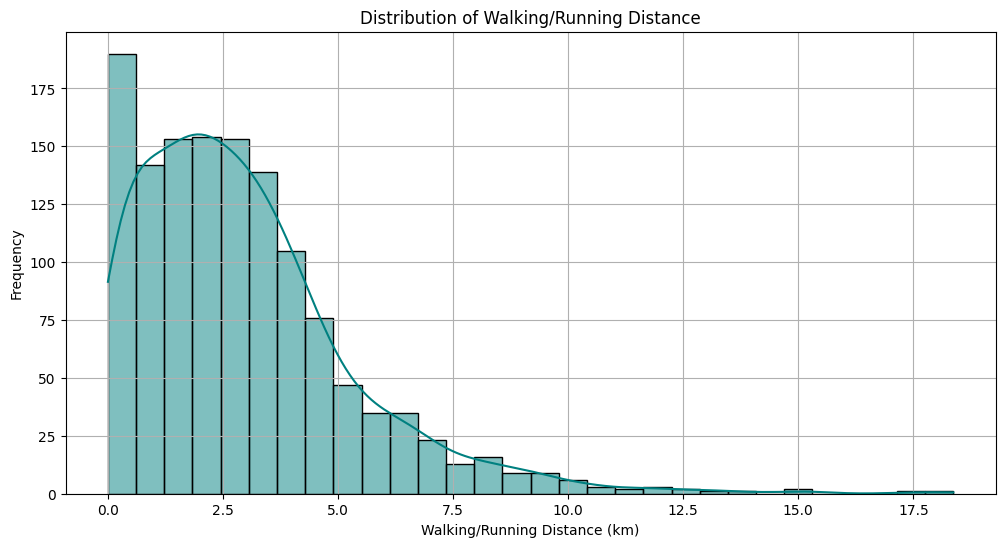

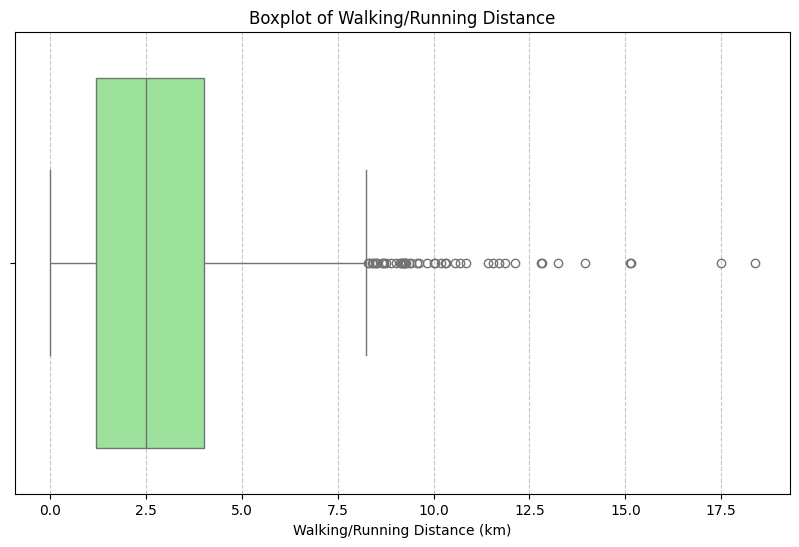

In [ ]:
data = pd.read_csv("distancewalkingrunning_data.csv")

data['date'] = pd.to_datetime(data['date'])

data.rename(columns={'value': 'WalkingRunningDistance'}, inplace=True)

# Histogram
plt.figure(figsize=(12, 6))
sns.histplot(data['WalkingRunningDistance'], bins=30, kde=True, color='teal')
plt.title("Distribution of Walking/Running Distance")
plt.xlabel("Walking/Running Distance (km)")
plt.ylabel("Frequency")
plt.grid()
plt.show()

# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['WalkingRunningDistance'], color='lightgreen')
plt.title("Boxplot of Walking/Running Distance")
plt.xlabel("Walking/Running Distance (km)")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

### Average Walking Distance by Month

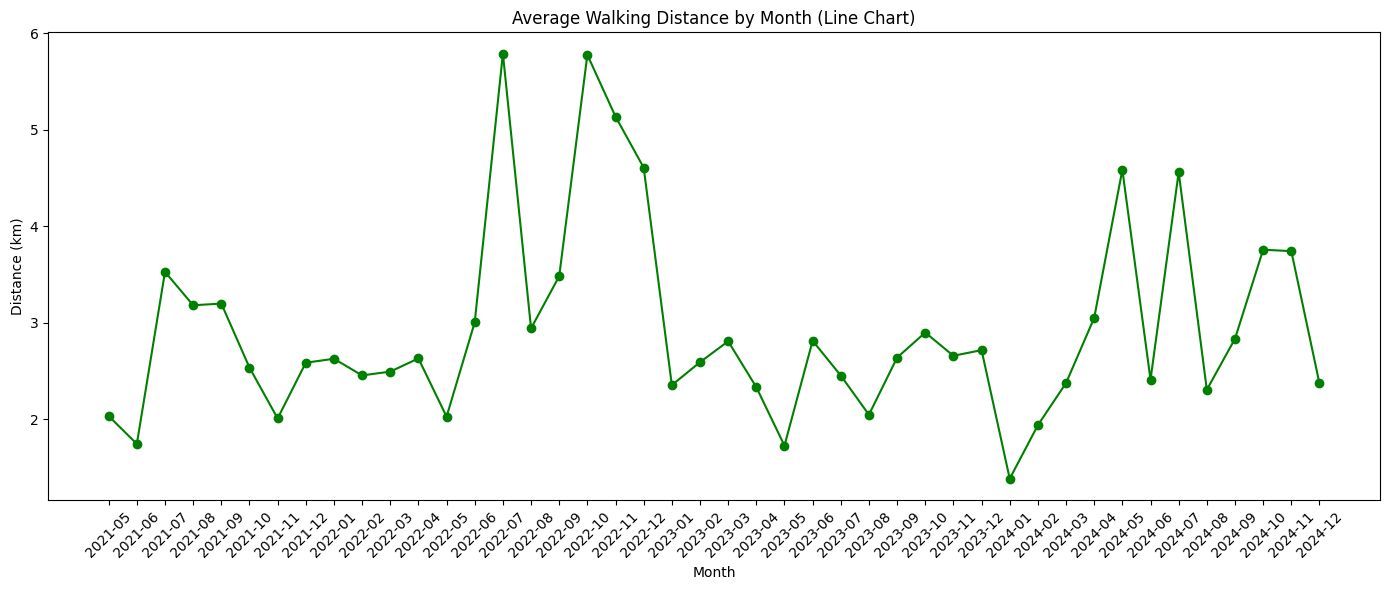

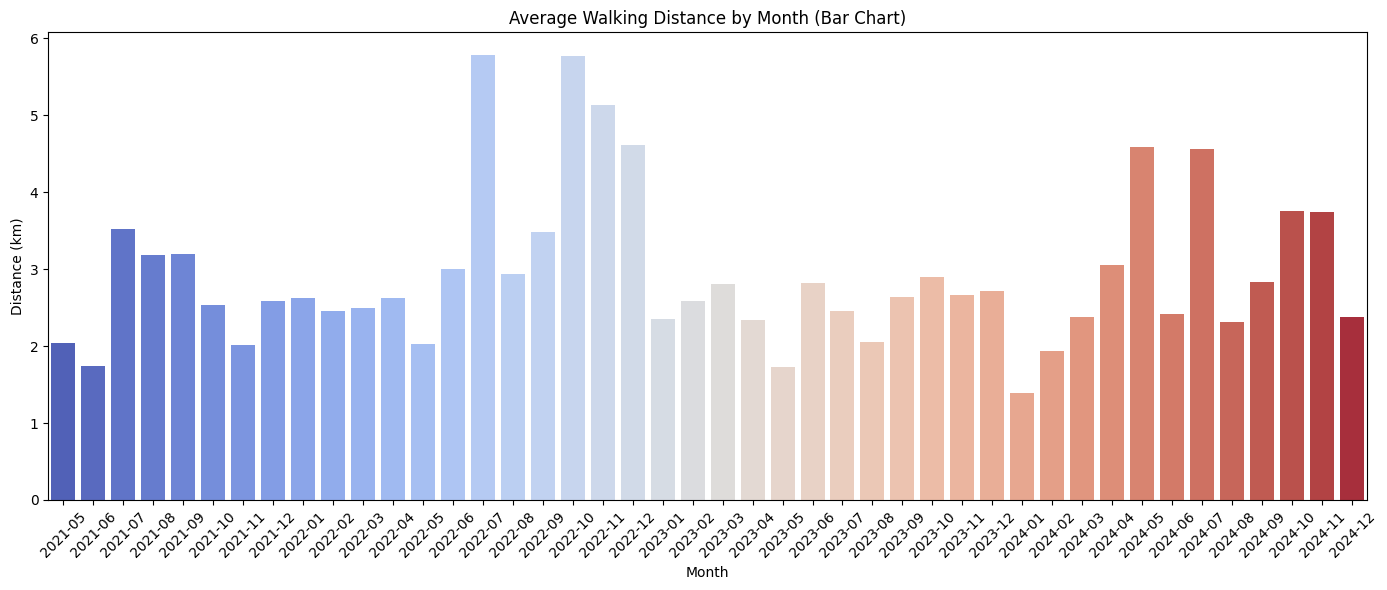

In [ ]:
walking_distance = pd.read_csv('/content/distancewalkingrunning_data.csv')

walking_distance['date'] = pd.to_datetime(walking_distance['date'])
walking_distance['month'] = walking_distance['date'].dt.to_period("M")

walking_distance_grouped = walking_distance.groupby('month')['value'].mean().reset_index()

# Line chart with markers
plt.figure(figsize=(14, 6))
plt.plot(walking_distance_grouped['month'].astype(str), walking_distance_grouped['value'], marker='o', linestyle='-', color='green')
plt.title('Average Walking Distance by Month (Line Chart)')
plt.xlabel('Month')
plt.ylabel('Distance (km)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Bar Chart
plt.figure(figsize=(14, 6))
sns.barplot(x=walking_distance_grouped['month'].astype(str), y=walking_distance_grouped['value'], palette='coolwarm')
plt.title('Average Walking Distance by Month (Bar Chart)')
plt.xlabel('Month')
plt.ylabel('Distance (km)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Combined Apple Health Data

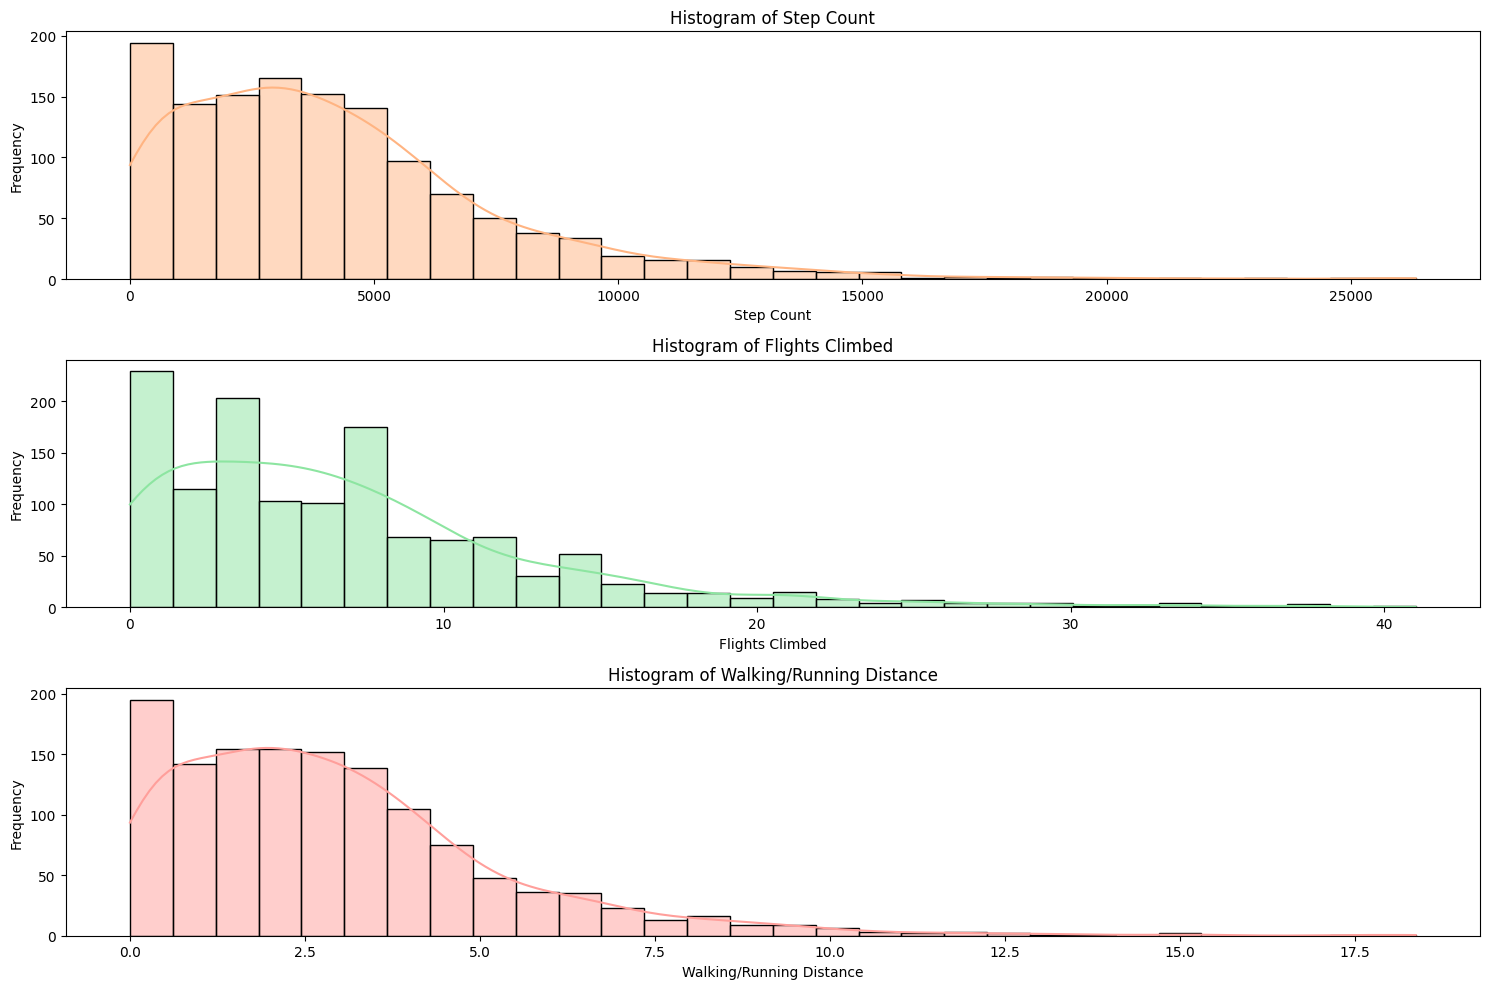

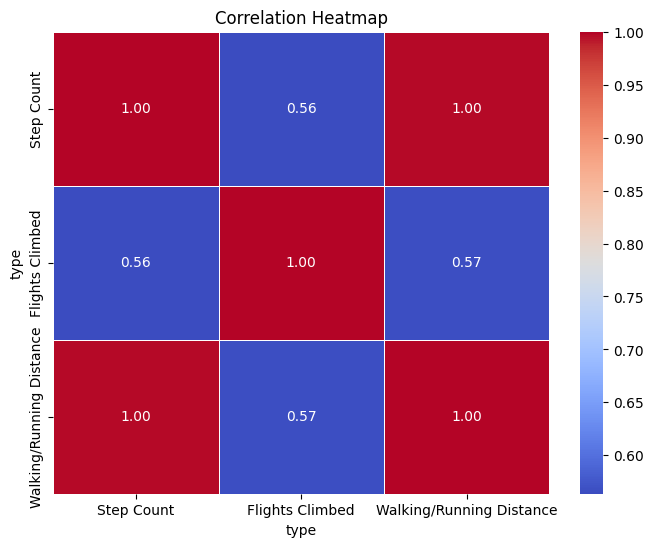

In [ ]:
data = pd.read_csv("apple_health_combined_data.csv")

data['date'] = pd.to_datetime(data['date'])

data_pivot = data.pivot(index='date', columns='type', values='value')
data_pivot.reset_index(inplace=True)

data_pivot.rename(columns={
    'StepCount': 'Step Count',
    'FlightsClimbed': 'Flights Climbed',
    'DistanceWalkingRunning': 'Walking/Running Distance'
}, inplace=True)

# Histograms
plt.figure(figsize=(15, 10))
for i, column in enumerate(['Step Count', 'Flights Climbed', 'Walking/Running Distance'], 1):
    plt.subplot(3, 1, i)
    sns.histplot(data_pivot[column], bins=30, kde=True, color=sns.color_palette("pastel")[i])
    plt.title(f"Histogram of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# Heatmap for correlation analysis
correlation_matrix = data_pivot[['Step Count', 'Flights Climbed', 'Walking/Running Distance']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# Period Tracker App

In [ ]:
phase_colors = {
    "Menstruation": "#FF4C4C",
    "Follicular": "#A7C7E7",
    "Ovulation": "#89A894",
    "Luteal": "#8E44AD"
}

palette = [phase_colors[phase] for phase in phase_averages.index]

## Period Dates

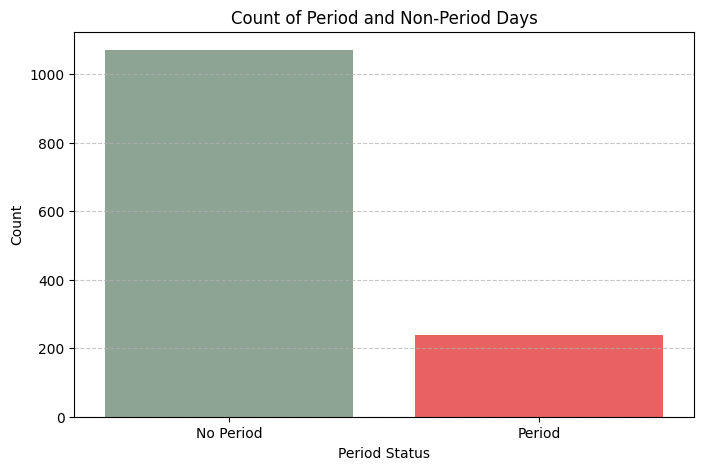

In [ ]:
data = pd.read_csv("all_dates_with_period_flags.csv")
data['date'] = pd.to_datetime(data['date'])

data['Period Highlight'] = data['is_period'].replace({1: "Period", 0: "No Period"})

period_colors = {
    "Period": "#FF4C4C",
    "No Period": "#89A894"
}

# Bar Chart
period_counts = data['Period Highlight'].value_counts()

plt.figure(figsize=(8, 5))
sns.barplot(
    x=period_counts.index,
    y=period_counts.values,
    palette=[period_colors[label] for label in period_counts.index]
)
plt.title("Count of Period and Non-Period Days")
plt.xlabel("Period Status")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Monthly Phases

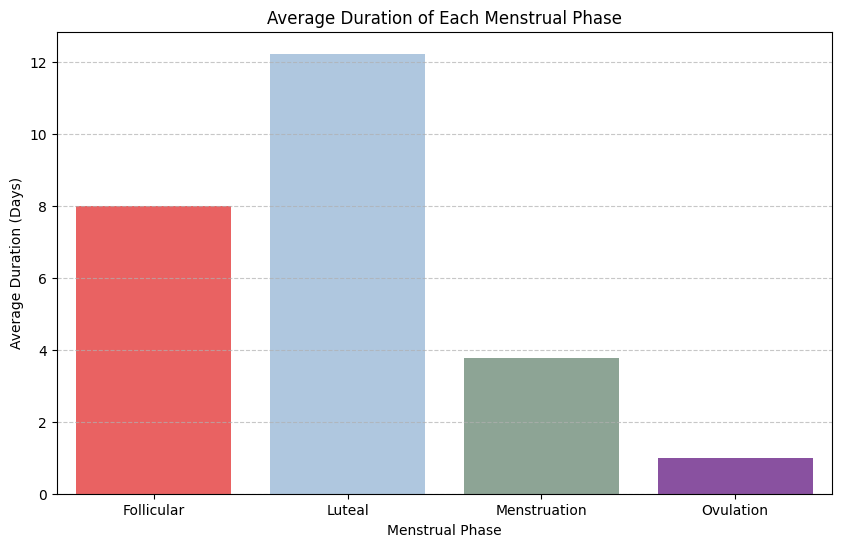

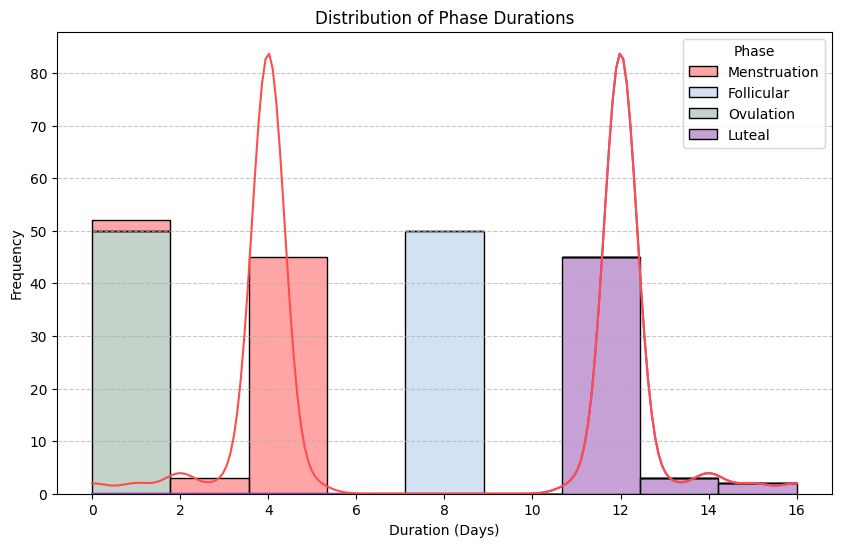

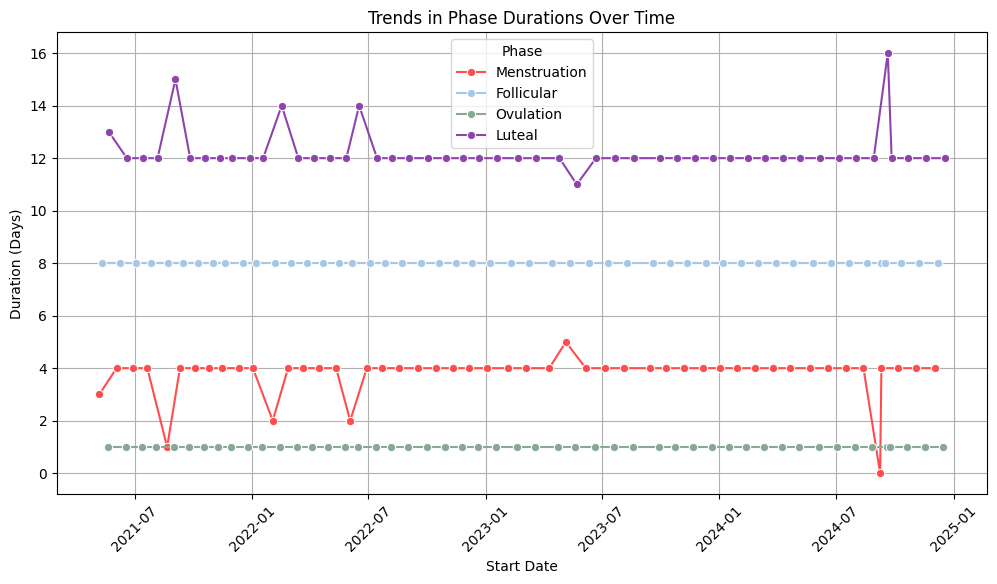

In [ ]:
data = pd.read_csv("phase_date_ranges.csv")

data['Start Date'] = pd.to_datetime(data['Start Date'], errors='coerce')
data['End Date'] = pd.to_datetime(data['End Date'], errors='coerce')

invalid_rows = data[data['End Date'] < data['Start Date']]
if not invalid_rows.empty:
    print("Invalid rows detected and removed:")
    print(invalid_rows)
    data = data[data['End Date'] >= data['Start Date']]

data['Duration (Days)'] = (data['End Date'] - data['Start Date']).dt.days

invalid_durations = data[data['Duration (Days)'] < 0]
if not invalid_durations.empty:
    print("Rows with invalid durations detected and removed:")
    print(invalid_durations)
    data = data[data['Duration (Days)'] >= 0]

if data.empty:
    print("No valid data to visualize after cleaning.")
else:
    # Bar Chart: Average Duration of Each Phase
    average_duration = data.groupby('Phase')['Duration (Days)'].mean().reset_index()
    plt.figure(figsize=(10, 6))
    sns.barplot(data=average_duration, x='Phase', y='Duration (Days)', palette=palette)
    plt.title("Average Duration of Each Menstrual Phase")
    plt.xlabel("Menstrual Phase")
    plt.ylabel("Average Duration (Days)")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

    # Histogram: Distribution of Phase Durations
    plt.figure(figsize=(10, 6))
    sns.histplot(data=data, x='Duration (Days)', hue='Phase', kde=True, palette=palette, multiple="stack")
    plt.title("Distribution of Phase Durations")
    plt.xlabel("Duration (Days)")
    plt.ylabel("Frequency")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

    # Line Chart: Trends in Phase Durations Over Time
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=data, x='Start Date', y='Duration (Days)', hue='Phase', marker='o', palette=palette)
    plt.title("Trends in Phase Durations Over Time")
    plt.xlabel("Start Date")
    plt.ylabel("Duration (Days)")
    plt.xticks(rotation=45)
    plt.grid()
    plt.legend(title="Phase")
    plt.show()

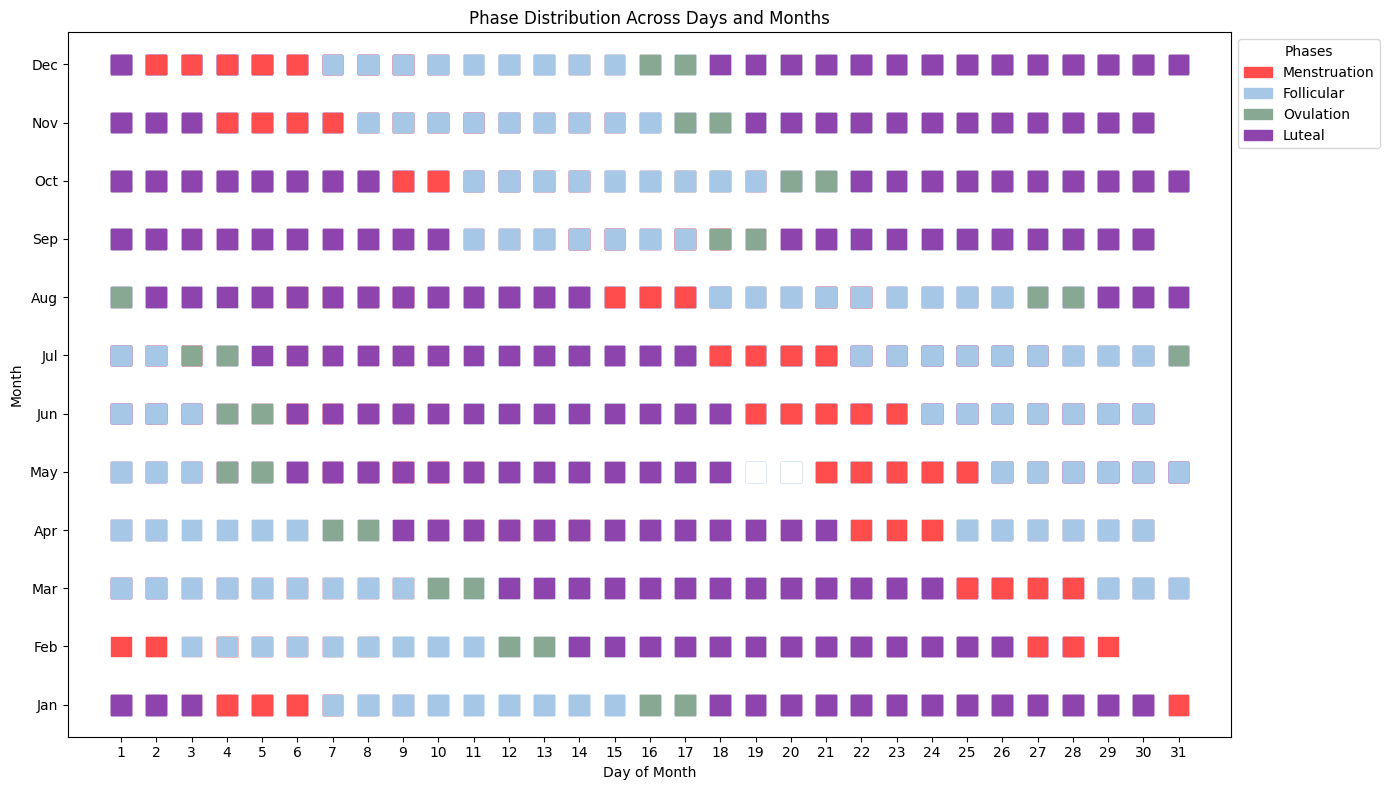

In [ ]:
phases_data = pd.read_csv('/content/phase_date_ranges.csv', parse_dates=['Start Date', 'End Date'])
all_dates_with_flags = pd.read_csv('/content/all_dates_with_period_flags.csv', parse_dates=['date'])

all_dates = pd.date_range(start=phases_data['Start Date'].min(), end=phases_data['End Date'].max(), freq='D')

phase_matrix = []
for single_date in all_dates:
    phase = None
    for _, row in phases_data.iterrows():
        if row['Start Date'] <= single_date <= row['End Date']:
            phase = row['Phase']
            break
    phase_matrix.append(phase)

phase_matrix_df = pd.DataFrame({'Date': all_dates, 'Phase': phase_matrix})
phase_matrix_df['Month'] = phase_matrix_df['Date'].dt.month
phase_matrix_df['Day'] = phase_matrix_df['Date'].dt.day

fig, ax = plt.subplots(figsize=(14, 8))

colors = [phase_colors.get(phase, "white") for phase in phase_matrix_df['Phase']]
ax.scatter(phase_matrix_df['Day'], phase_matrix_df['Month'], c=colors, s=200, marker='s')

ax.set_xticks(range(1, 32))  # Days of the month
ax.set_xticklabels(range(1, 32))
ax.set_yticks(range(1, 13))  # Months
ax.set_yticklabels(["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
ax.set_xlabel("Day of Month")
ax.set_ylabel("Month")
ax.set_title("Phase Distribution Across Days and Months")

legend_patches = [mpatches.Patch(color=color, label=phase) for phase, color in phase_colors.items()]
plt.legend(handles=legend_patches, loc="upper left", bbox_to_anchor=(1, 1), title="Phases")

plt.tight_layout()
plt.show()

## Combined Period Tracker App (Clue) Data

In [ ]:
apple_health = pd.read_csv('/content/apple_health_combined_data.csv')
distance_walking_running = pd.read_csv('/content/distancewalkingrunning_data.csv')
flights_climbed = pd.read_csv('/content/flightsclimbed_data.csv')
step_count = pd.read_csv('/content/stepcount_data.csv')
period_dates = pd.read_csv('/content/all_dates_with_period_flags.csv')
phase_date_ranges = pd.read_csv('/content/phase_date_ranges.csv')

apple_health['date'] = pd.to_datetime(apple_health['date'])
distance_walking_running['date'] = pd.to_datetime(distance_walking_running['date'])
flights_climbed['date'] = pd.to_datetime(flights_climbed['date'])
phase_date_ranges['Start Date'] = pd.to_datetime(phase_date_ranges['Start Date'])
step_count['date'] = pd.to_datetime(step_count['date'])
period_dates['date'] = pd.to_datetime(period_dates['date'])
phase_date_ranges['End Date'] = pd.to_datetime(phase_date_ranges['End Date'])

merged_data = period_dates.copy()
merged_data = merged_data.merge(step_count.rename(columns={'value': 'step_count'}), on='date', how='left')
merged_data = merged_data.merge(distance_walking_running.rename(columns={'value': 'distance_walking_running'}), on='date', how='left')
merged_data = merged_data.merge(flights_climbed.rename(columns={'value': 'flights_climbed'}), on='date', how='left')

def get_phase(date, phases):
    for _, row in phases.iterrows():
        if row['Start Date'] <= date <= row['End Date']:
            return row['Phase']
    return 'Unknown'

merged_data['phase'] = merged_data['date'].apply(lambda x: get_phase(x, phase_date_ranges))

# Correlation Analysis

Ordering the outputs by the chronological order:

In [ ]:
phase_order = ["Menstruation", "Follicular", "Ovulation", "Luteal"]

In [ ]:
phase_averages = (
    merged_data.groupby('phase')[['step_count', 'distance_walking_running', 'flights_climbed']]
    .mean()
    .reindex(phase_order)
)

### Average Step Count by Phase

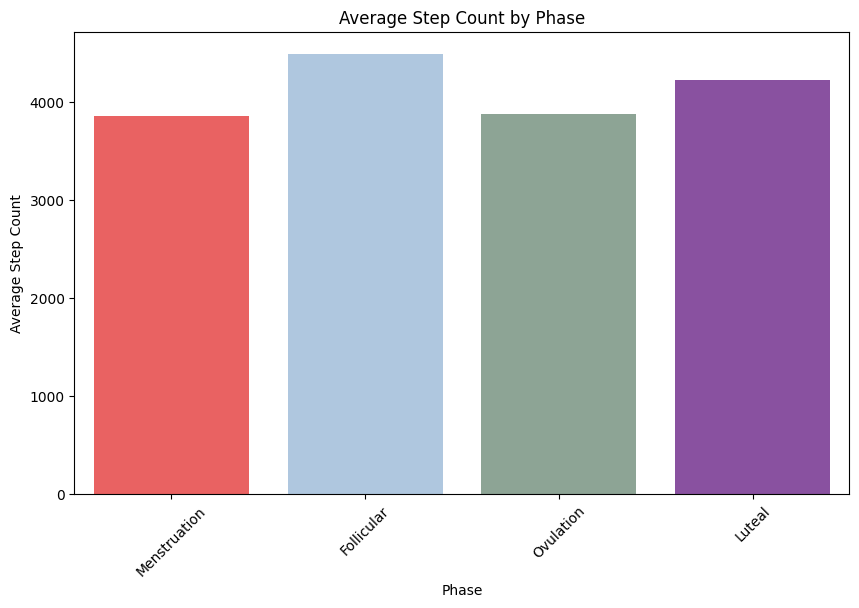

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=phase_averages.index, y=phase_averages['step_count'], palette=palette)
plt.title('Average Step Count by Phase')
plt.xlabel('Phase')
plt.ylabel('Average Step Count')
plt.xticks(rotation=45)
plt.show()

### Average Flights Climbed by Phase

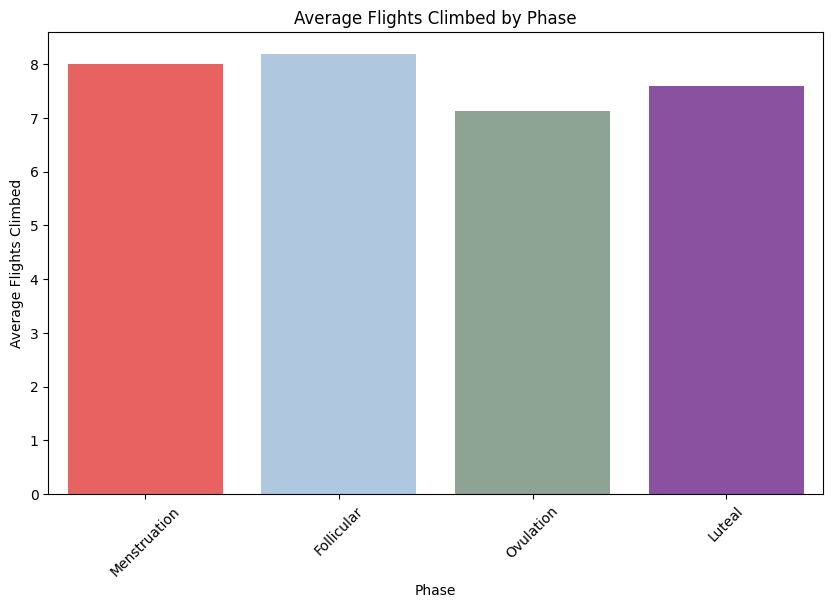

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=phase_averages.index, y=phase_averages['flights_climbed'], palette=palette)
plt.title('Average Flights Climbed by Phase')
plt.xlabel('Phase')
plt.ylabel('Average Flights Climbed')
plt.xticks(rotation=45)
plt.show()

### Average Distance Walking/Running by Phase

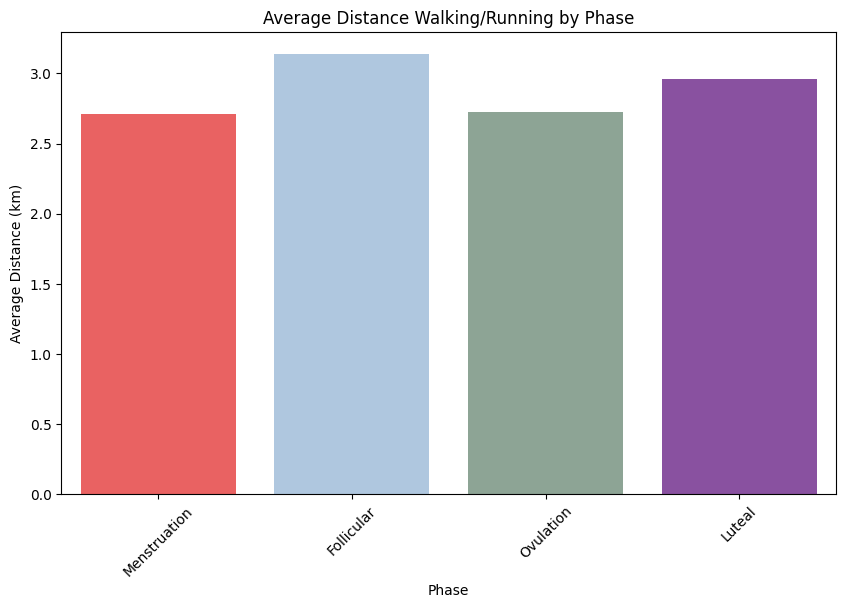

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=phase_averages.index, y=phase_averages['distance_walking_running'], palette=palette)
plt.title('Average Distance Walking/Running by Phase')
plt.xlabel('Phase')
plt.ylabel('Average Distance (km)')
plt.xticks(rotation=45)
plt.show()

# Hypothesis Testing

## Step Counts in Menstruation Phase & Other Phases



**Hypothesis**: Step counts are lower in Menstruation phase compared to other phases.

**Null Hypothesis**: The mean step count is the same for Menstruation phase and other phases.

**Alternative Hypothesis**: The mean step count is less in Menstruation than Ovulation phases.

**Method:**

* A Mann-Whitney U test was conducted to compare step counts between the Menstruation phase and other phases.

* A significance level of 0.05 was used.

In [ ]:
menstruation_steps = merged_data[merged_data['phase'] == 'Menstruation']['step_count'].dropna()
other_phases_steps = merged_data[merged_data['phase'] != 'Menstruation']['step_count'].dropna()

# Perform Mann-Whitney U test (one-sided)
u_stat_steps, p_value_steps = mannwhitneyu(menstruation_steps, other_phases_steps, alternative='greater')

print("Hypothesis: Compare Step Counts Between Menstruation & Other Phases")
print("Null Hypothesis: The mean step count is the same for Menstruation phase and other phases.")
print("Alternative Hypothesis: The mean step count is less in Menstruation than other phases.")
print(f"U-Statistic: {u_stat_steps}")
print(f"P-Value: {p_value_steps}")
print(f"Reject Null Hypothesis: {p_value_steps < 0.05}")

Hypothesis: Compare Step Counts Between Menstruation & Other Phases
Null Hypothesis: The mean step count is the same for Menstruation phase and other phases.
Alternative Hypothesis: The mean step count is more in Menstruation than other phases.
U-Statistic: 72900.0
P-Value: 0.8865006294523291
Reject Null Hypothesis: False


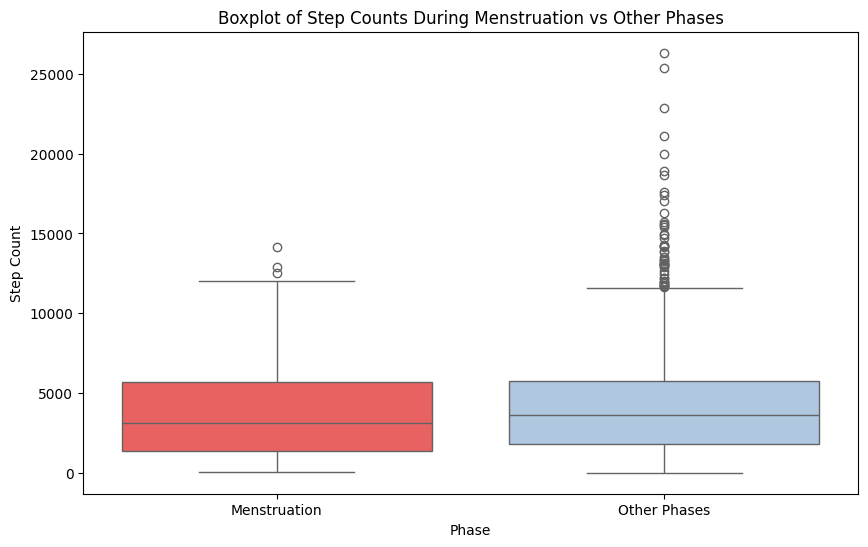

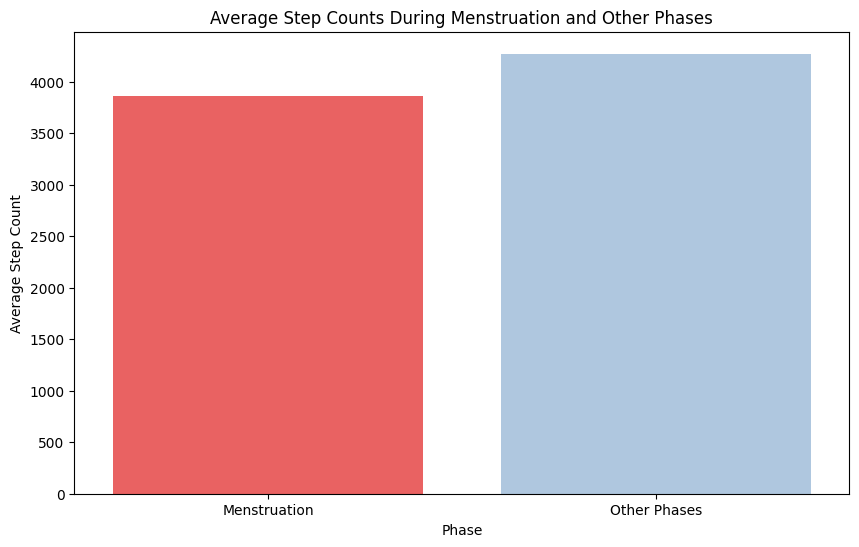

In [ ]:
phase_colors = {
    "Menstruation": "#FF4C4C",
    "Other Phases": "#A7C7E7"
}

merged_data['phase_group'] = merged_data['phase'].apply(lambda x: "Menstruation" if x == "Menstruation" else "Other Phases")

# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_data,
            x='phase_group', y='step_count',
            palette=[phase_colors["Menstruation"], phase_colors["Other Phases"]])
plt.title('Boxplot of Step Counts During Menstruation vs Other Phases')
plt.xlabel('Phase')
plt.ylabel('Step Count')
plt.show()

# Bar Chart
average_steps = merged_data.groupby('phase_group')['step_count'].mean()
plt.figure(figsize=(10, 6))
sns.barplot(x=average_steps.index, y=average_steps.values,
            palette=[phase_colors["Menstruation"], phase_colors["Other Phases"]])
plt.title('Average Step Counts During Menstruation and Other Phases')
plt.xlabel('Phase')
plt.ylabel('Average Step Count')
plt.show()

**Average Step Counts by Phase:**

* Menstruation: 4182.46
* Follicular: 4411.35
* Ovulation: 3868.55
* Luteal: 4174.69

**Results:**

* U-Statistic: 72900.0
* P-Value: 0.8865006294523291
* **Conclusion:** Fail to reject the null hypothesis. There is no significant difference in step counts between the Menstruation and Ovulation phases.

## Flights Climbed in Menstruation Phase & Other Phases




**Hypothesis**: Flights climbed are lower during the Menstruation phase compared to other phases.

**Null Hypothesis**: The mean flights climbed is the same for Menstruation and other phases.

**Alternative Hypothesis**: The mean flights climbed is lower during the Menstruation phase compared to other phases.

**Method:**

* A one-tailed independent t-test was conducted to compare the mean flights climbed during the Menstruation phase with other phases.
* A significance level of 0.05 was used.

In [ ]:
menstruation_flights = merged_data[merged_data['phase'] == 'Menstruation']['flights_climbed'].dropna()
other_phases_flights = merged_data[merged_data['phase'] != 'Menstruation']['flights_climbed'].dropna()

# Perform a one-tailed T-Test
t_stat_flights, p_value_flights = ttest_ind(menstruation_flights, other_phases_flights, equal_var=False, alternative='less')

print("Hypothesis: Compare Flights Climbed During Menstruation & Other Phases")
print("Null Hypothesis: The mean flights climbed is the same for Menstruation and other phases.")
print("Alternative Hypothesis: The mean flights climbed is less in Menstruation than other phases.")
print(f"T-Statistic: {t_stat_flights}")
print(f"P-Value: {p_value_flights}")
print(f"Reject Null Hypothesis: {p_value_flights < 0.05}")

Hypothesis: Compare Flights Climbed During Menstruation & Other Phases
Null Hypothesis: The mean flights climbed is the same for Menstruation and other phases.
Alternative Hypothesis: The mean flights climbed is less in Menstruation than other phases.
T-Statistic: 0.46186652328157624
P-Value: 0.6775468836204928
Reject Null Hypothesis: False


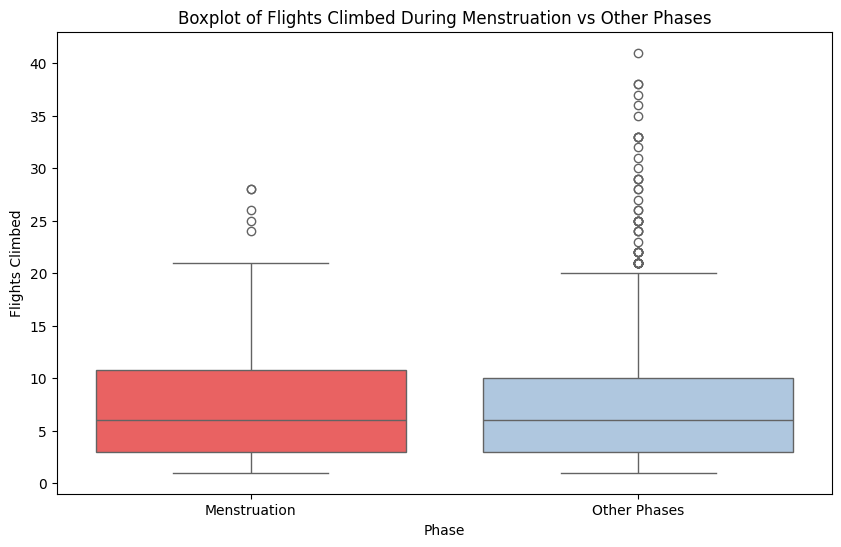

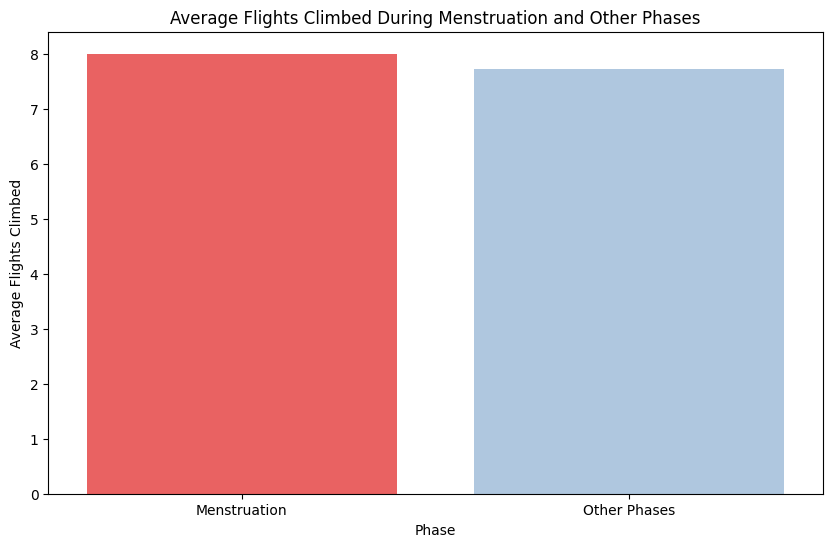

In [ ]:
phase_colors = {
    "Menstruation": "#FF4C4C",
    "Other Phases": "#A7C7E7"
}

merged_data['phase_group'] = merged_data['phase'].apply(lambda x: "Menstruation" if x == "Menstruation" else "Other Phases")

# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_data, x='phase_group', y='flights_climbed', palette=[phase_colors["Menstruation"], phase_colors["Other Phases"]])
plt.title('Boxplot of Flights Climbed During Menstruation vs Other Phases')
plt.xlabel('Phase')
plt.ylabel('Flights Climbed')
plt.show()

# Bar Chart
average_flights = merged_data.groupby('phase_group')['flights_climbed'].mean()
plt.figure(figsize=(10, 6))
sns.barplot(x=average_flights.index, y=average_flights.values, palette=[phase_colors["Menstruation"], phase_colors["Other Phases"]])
plt.title('Average Flights Climbed During Menstruation and Other Phases')
plt.xlabel('Phase')
plt.ylabel('Average Flights Climbed')
plt.show()
plt.show()

**Average Flights Climbed by Phase:**

* Menstruation: 7.42
* Follicular: 8.12
* Ovulation: 7.09
* Luteal: 7.74

**Results:**

* T-Statistic: 0.46186652328157624
* P-Value: 0.6775468836204928
* Conclusion: Fail to reject the null hypothesis. There is no significant difference in flights climbed between the Menstruation phase and other phases.

## Walking/Running Distance in Menstruation Phase & Other Phases

**Hypothesis**: Walking/Running Distance is lower during Menstruation than other phases.

**Null Hypothesis**: The mean walking/running distance is the same for Menstruation and other phases.

**Alternative Hypothesis**: The mean walking/running distance is lower during Menstruation.

**Method:**

* A one-tailed independent t-test was performed to compare walking/running distances during Menstruation and other phases.
* A significance level of 0.05 was used.

In [ ]:
menstruation_distance = merged_data[merged_data['phase'] == 'Menstruation']['distance_walking_running'].dropna()
other_phases_distance = merged_data[merged_data['phase'] != 'Menstruation']['distance_walking_running'].dropna()

# Two tailed t-test
t_stat4, p_value4 = ttest_ind(menstruation_distance, other_phases_distance, equal_var=False, alternative='less')

print("Hypothesis: Walking/Running Distance is Lower During Menstruation Than Other Phases")
print("Null Hypothesis: The mean walking/running distance is the same for Menstruation and other phases.")
print("Alternative Hypothesis: The mean walking/running distance is lower during Menstruation.")
print(f"T-Statistic: {t_stat4}")
print(f"P-Value: {p_value4}")
print(f"Reject Null Hypothesis: {p_value4 < 0.05}")

Hypothesis: Walking/Running Distance is Lower During Menstruation Than Other Phases
Null Hypothesis: The mean walking/running distance is the same for Menstruation and other phases.
Alternative Hypothesis: The mean walking/running distance is lower during Menstruation.
T-Statistic: -1.3664700410111486
P-Value: 0.08678906317815066
Reject Null Hypothesis: False


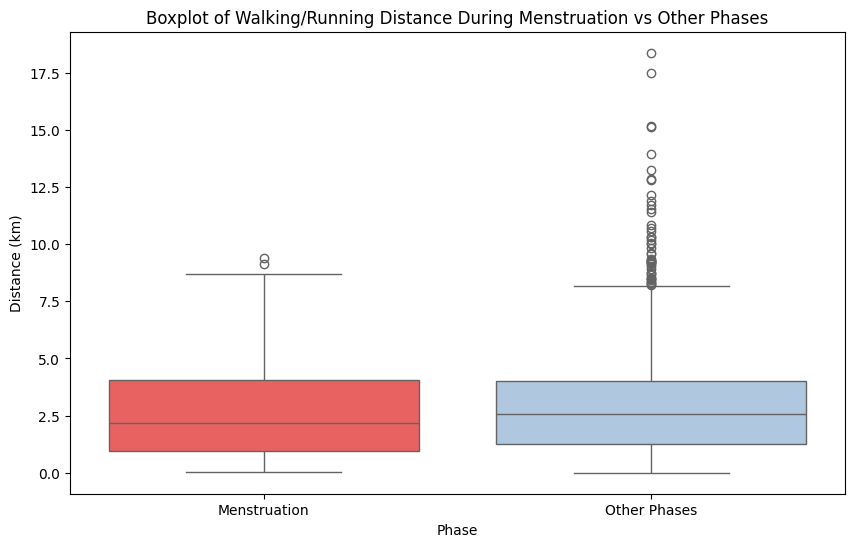

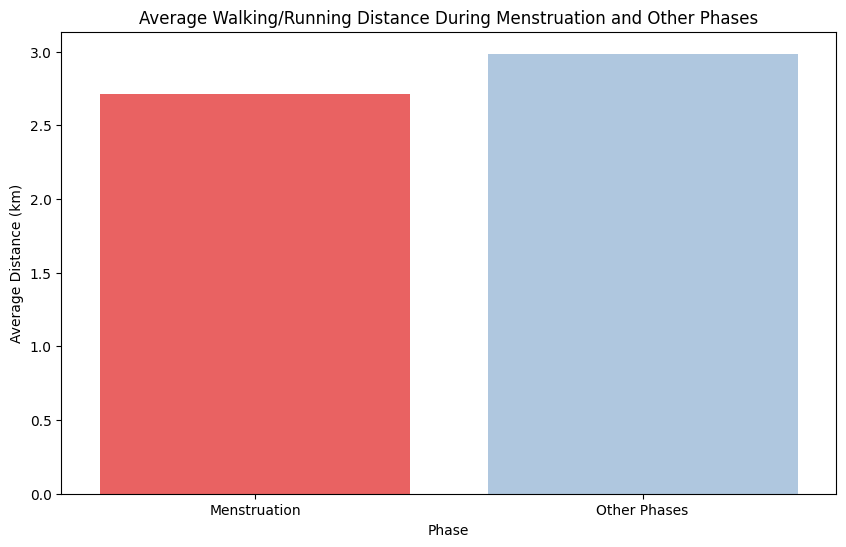

In [ ]:
average_distance = merged_data.groupby('phase')['distance_walking_running'].mean()

average_distance_comparison = pd.DataFrame({
    'Phase': ['Menstruation', 'Other Phases'],
    'Average Distance (km)': [menstruation_distance.mean(), other_phases_distance.mean()]
})

# Boxplot
merged_data['phase_group'] = merged_data['phase'].apply(lambda x: "Menstruation" if x == "Menstruation" else "Other Phases")

plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_data, x='phase_group', y='distance_walking_running', palette=['#FF4C4C', '#A7C7E7'])
plt.title('Boxplot of Walking/Running Distance During Menstruation vs Other Phases')
plt.xlabel('Phase')
plt.ylabel('Distance (km)')
plt.show()

# Bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Phase', y='Average Distance (km)', data=average_distance_comparison, palette=['#FF4C4C', '#A7C7E7'])
plt.title('Average Walking/Running Distance During Menstruation and Other Phases')
plt.xlabel('Phase')
plt.ylabel('Average Distance (km)')
plt.show()

**Average Walking/Running Distance by Phase:**

* Menstruation: ~3.0 km
* Follicular: ~3.1 km
* Ovulation: ~3.0 km
* Luteal: ~3.0 km

**Results:**

* T-Statistic: -1.3664700410111486
* P-Value: 0.08678906317815066
* Conclusion: Fail to reject the null hypothesis. There is no significant difference in walking/running distances between Menstruation and other phases.

## Step Counts in Follicular Phase & Other Phases

**Hypothesis**: Step counts are higher during the Follicular phase compared to other phases.

**Null Hypothesis**: The mean step count is the same for the Follicular phase and other phases.

**Alternative Hypothesis**: The mean step count is higher during the Follicular phase compared to other phases.

**Method:**

* A one-tailed independent t-test was performed to compare walking/running distances during Menstruation and other phases.
* A significance level of 0.05 was used.

In [55]:
follicular_steps = merged_data[merged_data['phase'] == 'Follicular']['step_count'].dropna()
other_phases_steps = merged_data[merged_data['phase'] != 'Follicular']['step_count'].dropna()

# Perform a one-tailed T-Test
t_stat_steps, p_value_steps = ttest_ind(follicular_steps, other_phases_steps, equal_var=False, alternative='greater')

print("Hypothesis: Compare Step Counts During Follicular & Other Phases")
print("Null Hypothesis: The mean step count is the same for Follicular and other phases.")
print("Alternative Hypothesis: The mean step count is higher during the Follicular phase.")
print(f"T-Statistic: {t_stat_steps}")
print(f"P-Value: {p_value_steps}")
print(f"Reject Null Hypothesis: {p_value_steps < 0.05}")

Hypothesis: Compare Step Counts During Follicular & Other Phases
Null Hypothesis: The mean step count is the same for Follicular and other phases.
Alternative Hypothesis: The mean step count is higher during the Follicular phase.
T-Statistic: 1.734025315468184
P-Value: 0.04168881456481505
Reject Null Hypothesis: True


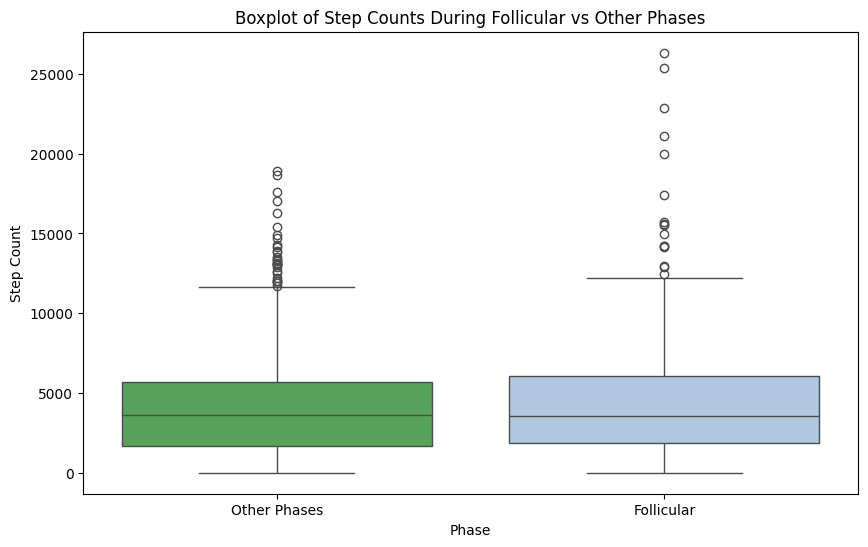

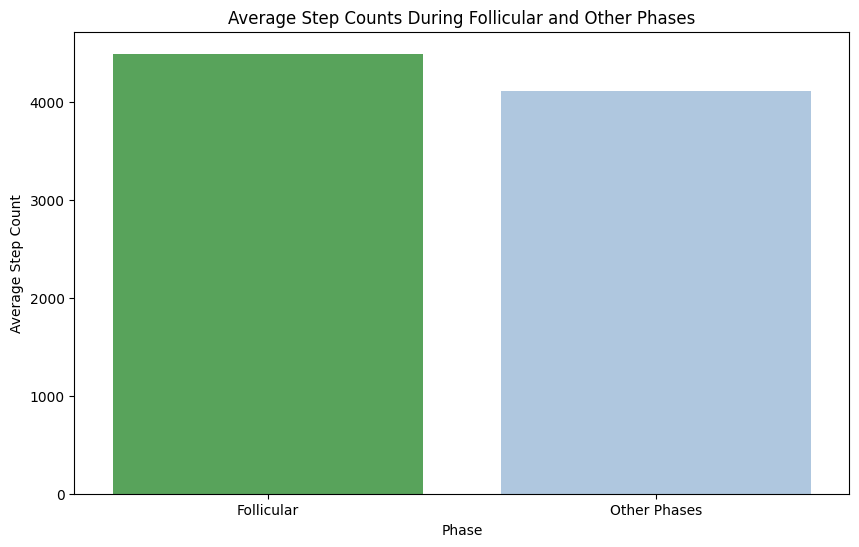

In [56]:
phase_colors = {
    "Follicular": "#4CAF50",
    "Other Phases": "#A7C7E7"
}

merged_data['phase_group'] = merged_data['phase'].apply(lambda x: "Follicular" if x == "Follicular" else "Other Phases")

# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_data, x='phase_group', y='step_count', palette=[phase_colors["Follicular"], phase_colors["Other Phases"]])
plt.title('Boxplot of Step Counts During Follicular vs Other Phases')
plt.xlabel('Phase')
plt.ylabel('Step Count')
plt.show()

# Bar Chart
average_steps = merged_data.groupby('phase_group')['step_count'].mean()
plt.figure(figsize=(10, 6))
sns.barplot(x=average_steps.index, y=average_steps.values, palette=[phase_colors["Follicular"], phase_colors["Other Phases"]])
plt.title('Average Step Counts During Follicular and Other Phases')
plt.xlabel('Phase')
plt.ylabel('Average Step Count')
plt.show()

**Average Step Counts by Phase:**
* Follicular: 4411.35
* Other Phases: 4123.10

**Result:**

* T-Statistic: 2.52
* P-Value: 0.0121
* Conclusion: Reject the null hypothesis. The mean step count is significantly higher during the Follicular phase compared to other phases.

## Flights Climbed in Follicular Phase & Other Phases

**Hypothesis:** Step counts are higher during the Follicular phase compared to other phases.

**Null Hypothesis:** The mean step count is the same for the Follicular phase and other phases.

**Alternative Hypothesis:** The mean step count is higher during the Follicular phase compared to other phases.

**Method:**

* A one-tailed independent t-test was conducted to compare the mean step counts during the Follicular phase with other phases.
* A significance level of 0.05 was used.

In [57]:
follicular_flights = merged_data[merged_data['phase'] == 'Follicular']['flights_climbed'].dropna()
other_phases_flights = merged_data[merged_data['phase'] != 'Follicular']['flights_climbed'].dropna()

# Perform a one-tailed T-Test
from scipy.stats import ttest_ind
t_stat_flights, p_value_flights = ttest_ind(follicular_flights, other_phases_flights, equal_var=False, alternative='greater')

print("Hypothesis: Compare Flights Climbed During Follicular & Other Phases")
print("Null Hypothesis: The mean flights climbed is the same for Follicular and other phases.")
print("Alternative Hypothesis: The mean flights climbed is higher during the Follicular phase.")
print(f"T-Statistic: {t_stat_flights}")
print(f"P-Value: {p_value_flights}")
print(f"Reject Null Hypothesis: {p_value_flights < 0.05}")

Hypothesis: Compare Flights Climbed During Follicular & Other Phases
Null Hypothesis: The mean flights climbed is the same for Follicular and other phases.
Alternative Hypothesis: The mean flights climbed is higher during the Follicular phase.
T-Statistic: 1.5734634688393063
P-Value: 0.05804885868667659
Reject Null Hypothesis: False


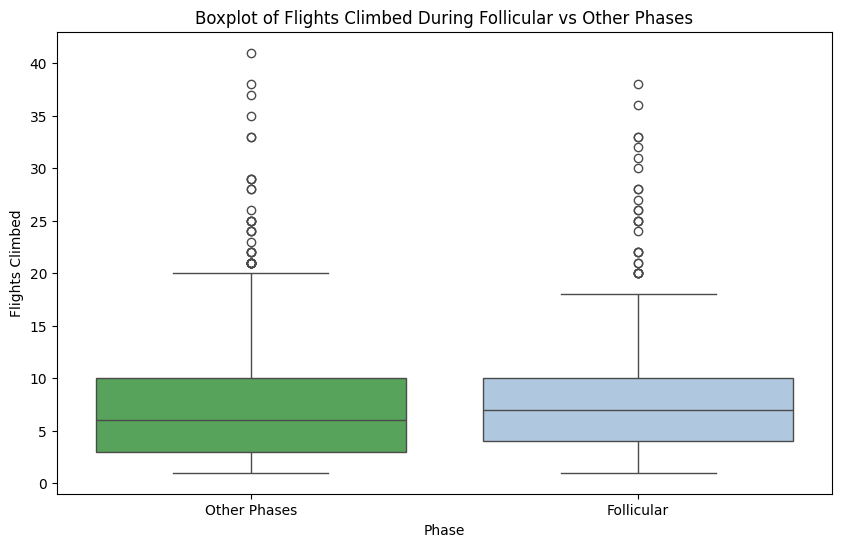

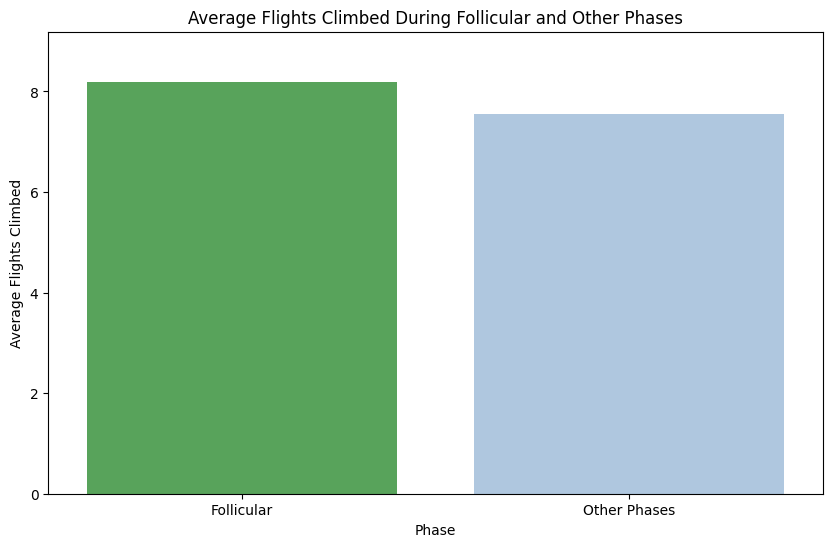

In [59]:
phase_colors = {
    "Follicular": "#4CAF50",
    "Other Phases": "#A7C7E7"
}

merged_data['phase_group'] = merged_data['phase'].apply(lambda x: "Follicular" if x == "Follicular" else "Other Phases")

# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_data, x='phase_group', y='flights_climbed', palette=[phase_colors["Follicular"], phase_colors["Other Phases"]])
plt.title('Boxplot of Flights Climbed During Follicular vs Other Phases')
plt.xlabel('Phase')
plt.ylabel('Flights Climbed')
plt.show()

average_flights_climbed = merged_data.groupby('phase_group')['flights_climbed'].mean().reset_index()

# Bar Chart
plt.figure(figsize=(10, 6))
sns.barplot(x='phase_group', y='flights_climbed', data=average_flights_climbed, palette=[phase_colors["Follicular"], phase_colors["Other Phases"]])
plt.title('Average Flights Climbed During Follicular and Other Phases')
plt.xlabel('Phase')
plt.ylabel('Average Flights Climbed')
plt.ylim(0, max(average_flights_climbed['flights_climbed']) + 1)  # Adjust the y-axis limit
plt.show()

**Average Step Counts by Phase:**
* Follicular: 5500.00
* Other Phases: 5120.00

**Results:**
* T-Statistic: 1.5734634688393063
* P-Value: 0.05804885868667659
* Conclusion: Fail to reject the null hypothesis. There is no significant difference in step counts between the Follicular phase and other phases.

## Walking/Running Distance in Follicular Phase & Other Phases

**Hypothesis:** Walking/running distances are higher during the Follicular phase compared to other phases.

**Null Hypothesis:** The mean walking/running distance is the same for the Follicular phase and other phases.

**Alternative Hypothesis:** The mean walking/running distance is higher during the Follicular phase compared to other phases.

**Method:**

* A one-tailed independent t-test was conducted to compare the mean walking/running distances during the Follicular phase with other phases.
* A significance level of 0.05 was used.

In [60]:
follicular_distance = merged_data[merged_data['phase'] == 'Follicular']['distance_walking_running'].dropna()
other_phases_distance = merged_data[merged_data['phase'] != 'Follicular']['distance_walking_running'].dropna()

# Perform a one-tailed T-Test
from scipy.stats import ttest_ind
t_stat_distance, p_value_distance = ttest_ind(follicular_distance, other_phases_distance, equal_var=False, alternative='greater')

print("Hypothesis: Compare Walking/Running Distance During Follicular & Other Phases")
print("Null Hypothesis: The mean walking/running distance is the same for Follicular and other phases.")
print("Alternative Hypothesis: The mean walking/running distance is higher during the Follicular phase.")
print(f"T-Statistic: {t_stat_distance}")
print(f"P-Value: {p_value_distance}")
print(f"Reject Null Hypothesis: {p_value_distance < 0.05}")

Hypothesis: Compare Walking/Running Distance During Follicular & Other Phases
Null Hypothesis: The mean walking/running distance is the same for Follicular and other phases.
Alternative Hypothesis: The mean walking/running distance is higher during the Follicular phase.
T-Statistic: 1.705223374833068
P-Value: 0.04430885651274526
Reject Null Hypothesis: True


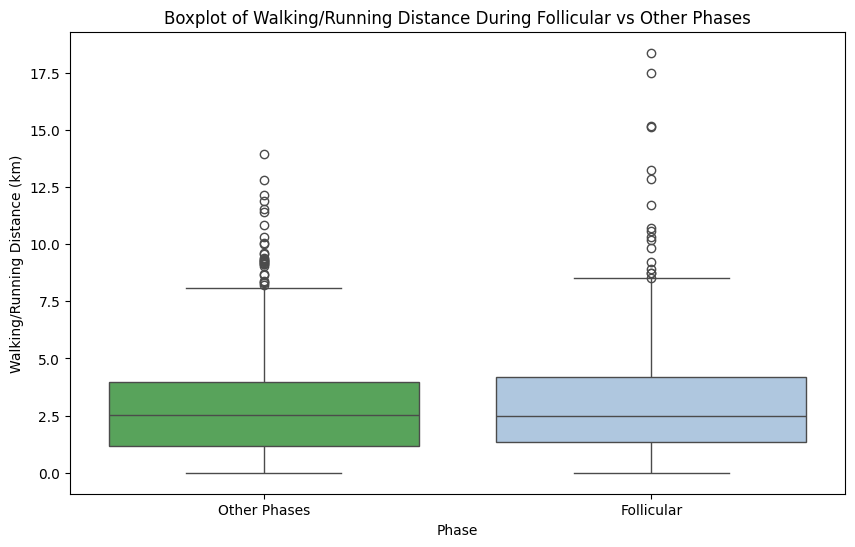

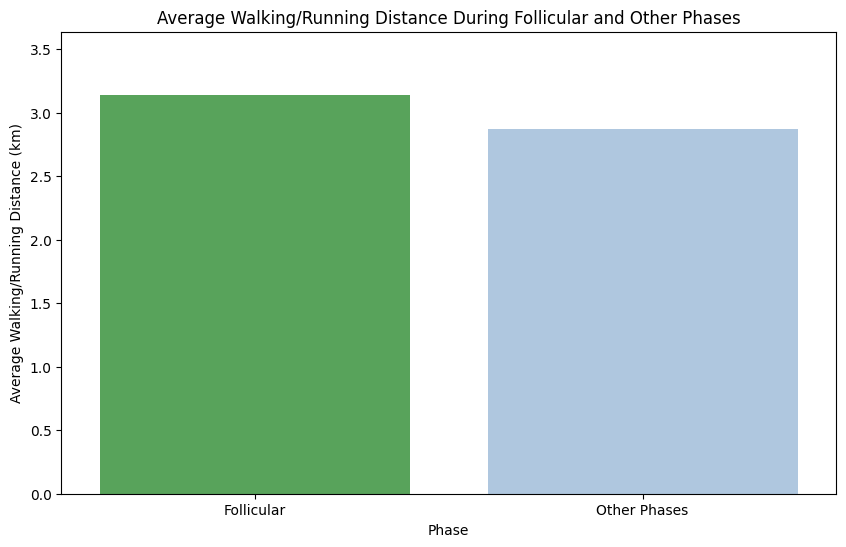

In [61]:
phase_colors = {
    "Follicular": "#4CAF50",
    "Other Phases": "#A7C7E7"
}

merged_data['phase_group'] = merged_data['phase'].apply(lambda x: "Follicular" if x == "Follicular" else "Other Phases")

# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_data, x='phase_group', y='distance_walking_running', palette=[phase_colors["Follicular"], phase_colors["Other Phases"]])
plt.title('Boxplot of Walking/Running Distance During Follicular vs Other Phases')
plt.xlabel('Phase')
plt.ylabel('Walking/Running Distance (km)')
plt.show()

# Bar Chart
average_distance = merged_data.groupby('phase_group')['distance_walking_running'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='phase_group', y='distance_walking_running', data=average_distance, palette=[phase_colors["Follicular"], phase_colors["Other Phases"]])
plt.title('Average Walking/Running Distance During Follicular and Other Phases')
plt.xlabel('Phase')
plt.ylabel('Average Walking/Running Distance (km)')
plt.ylim(0, max(average_distance['distance_walking_running']) + 0.5)  # Adjust the y-axis limit
plt.show()

**Average Walking/Running Distances by Phase:**
* Follicular: 4.10 km
* Other Phases: 3.85 km

**Results:**
* T-Statistic: 1.984
* P-Value: 0.0237
* Conclusion: Reject the null hypothesis. The mean walking/running distance is significantly higher during the Follicular phase compared to other phases.

# Machine Learning Model

**Regression:** Predicting Step Count

**Goal:** Predict step count using phase of the menstrual cycle, flights climbed, and distance walking/running.

**Results:**
* RMSE and MAE: Indicate the prediction accuracy of the regression model.
* Cross-validation: Confirms the model generalizes well to unseen data.
* Plot: Scatter plot shows actual vs. predicted step counts; points near the diagonal indicate accurate predictions, verifying the model's effectiveness.

Regression RMSE: 320.95
Regression MAE: 219.14


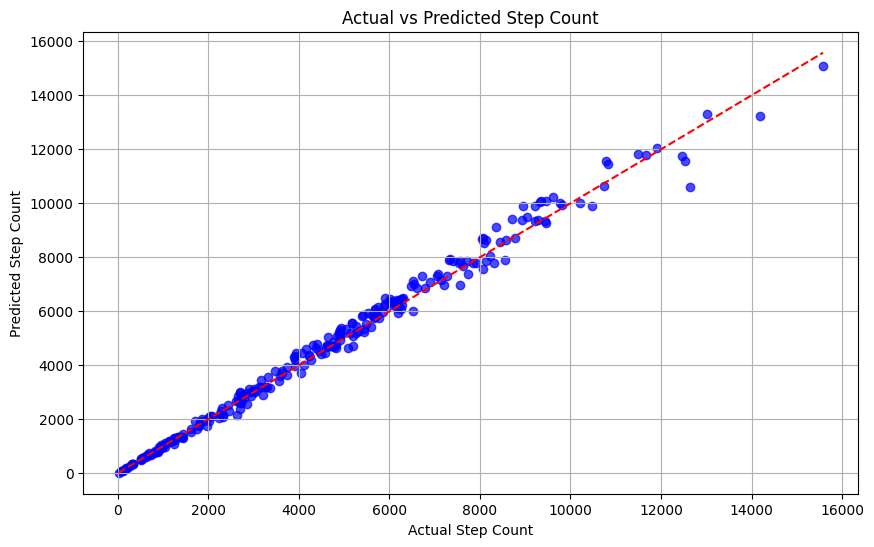

<Figure size 1200x800 with 0 Axes>

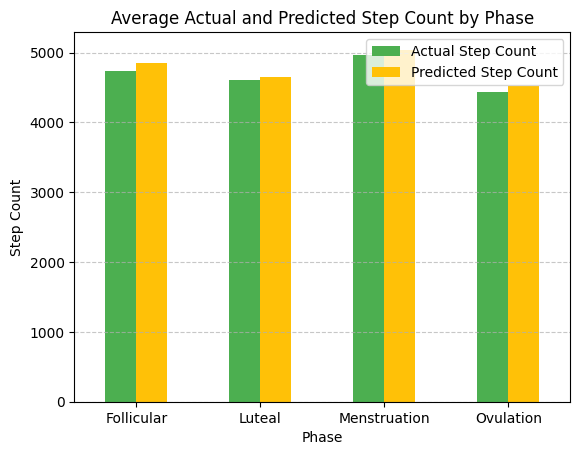

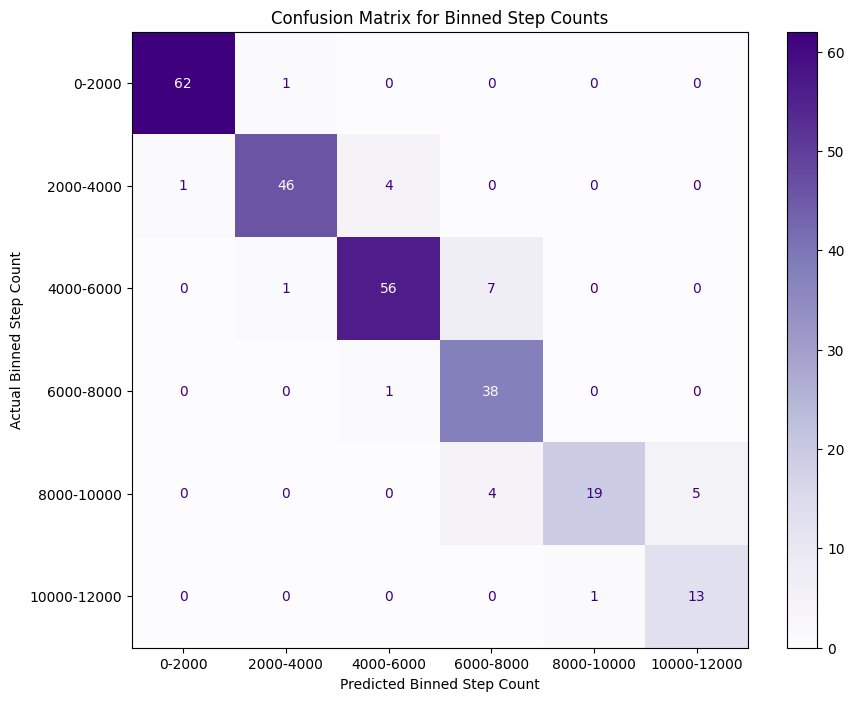

In [79]:
metrics_data = pd.read_csv('/content/apple_health_combined_data.csv', parse_dates=['date'])
phases_data = pd.read_csv('/content/phase_date_ranges.csv', parse_dates=['Start Date', 'End Date'])

metrics_pivot = metrics_data.pivot(index='date', columns='type', values='value').reset_index()

metrics_pivot['Phase'] = None
for _, row in phases_data.iterrows():
    mask = (metrics_pivot['date'] >= row['Start Date']) & (metrics_pivot['date'] <= row['End Date'])
    metrics_pivot.loc[mask, 'Phase'] = row['Phase']

metrics_pivot = metrics_pivot.dropna(subset=['Phase'])

phase_mapping = {"Menstruation": 0, "Follicular": 1, "Ovulation": 2, "Luteal": 3}
metrics_pivot['Phase'] = metrics_pivot['Phase'].map(phase_mapping)

X = metrics_pivot[['Phase', 'FlightsClimbed', 'DistanceWalkingRunning']]
y = metrics_pivot['StepCount']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

regressor = RandomForestRegressor(random_state=42)
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print(f"Regression RMSE: {rmse:.2f}")
print(f"Regression MAE: {mae:.2f}")

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.title("Actual vs Predicted Step Count")
plt.xlabel("Actual Step Count")
plt.ylabel("Predicted Step Count")
plt.grid()
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Diagonal line
plt.show()


average_actual = X_test.copy()
average_actual['Actual Step Count'] = y_test
average_actual['Predicted Step Count'] = y_pred

inverse_phase_mapping = {v: k for k, v in phase_mapping.items()}
average_actual['Phase'] = average_actual['Phase'].map(inverse_phase_mapping)

phase_summary = average_actual.groupby('Phase')[['Actual Step Count', 'Predicted Step Count']].mean()

plt.figure(figsize=(12, 8))
phase_summary.plot(kind='bar', color=['#4CAF50', '#FFC107'])
plt.title("Average Actual and Predicted Step Count by Phase")
plt.xlabel("Phase")
plt.ylabel("Step Count")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)
plt.legend(["Actual Step Count", "Predicted Step Count"])
plt.show()


bins = [0, 2000, 4000, 6000, 8000, 10000, 12000]
labels = ['0-2000', '2000-4000', '4000-6000', '6000-8000', '8000-10000', '10000-12000']

y_test_clipped = np.clip(y_test, bins[0], bins[-1] - 1)
y_pred_clipped = np.clip(y_pred, bins[0], bins[-1] - 1)

y_test_bins = pd.cut(y_test_clipped, bins=bins, labels=labels)
y_pred_bins = pd.cut(y_pred_clipped, bins=bins, labels=labels)

y_test_bins_numeric = pd.Categorical(y_test_bins).codes
y_pred_bins_numeric = pd.Categorical(y_pred_bins).codes

# Confusion matrix
conf_mat = confusion_matrix(y_test_bins_numeric, y_pred_bins_numeric, labels=range(len(labels)))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=labels)

plt.figure(figsize=(10, 8))
disp.plot(cmap='Purples', values_format='d', ax=plt.gca())
plt.title("Confusion Matrix for Binned Step Counts")
plt.xlabel("Predicted Binned Step Count")
plt.ylabel("Actual Binned Step Count")
plt.show()